<a href="https://colab.research.google.com/github/djdtimit/Deep-Learning/blob/master/Classifying_newswires_(Reuters)_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying newswires from Reuters

## the dataset

In [0]:
import keras

In [0]:
from keras.datasets import reuters

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [125]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [126]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [127]:
len(train_data)

8982

In [128]:
len(test_data)

2246

In [129]:
len(set(train_labels))

46

In [130]:
set(train_labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45}

## Preparing the data

In [0]:
import numpy as np

In [0]:
def vectorice_sequences(sequence, dimension=10000):
  index_matrix = np.zeros((len(sequence), dimension))

  for i, seq in enumerate(sequence):
    index_matrix[i, seq] = 1.0
  return index_matrix

In [0]:
X_train = vectorice_sequences(train_data)
X_test = vectorice_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [136]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the network

In [0]:
from keras import models, layers

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=64,activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=64,activation='relu'))
model.add(layer=layers.Dense(units=46,activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Validation data

In [0]:
X_val = X_train[:1000]
y_val = one_hot_train_labels[:1000]

X_partial_train = X_train[1000:]
y_partial_train = one_hot_train_labels[1000:]

## Train the model

In [141]:
history = model.fit(x=X_partial_train, y=y_partial_train, batch_size=512,epochs=20,validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 102us/step - loss: 2.5557 - acc: 0.5159 - val_loss: 1.7035 - val_acc: 0.6400
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.3926 - acc: 0.7072 - val_loss: 1.2901 - val_acc: 0.7160
Epoch 3/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.0422 - acc: 0.7724 - val_loss: 1.1232 - val_acc: 0.7480
Epoch 4/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.8230 - acc: 0.8236 - val_loss: 1.0370 - val_acc: 0.7690
Epoch 5/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.6578 - acc: 0.8636 - val_loss: 0.9589 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.5297 - acc: 0.8893 - val_loss: 0.9190 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.4254 - acc: 0.9116 - val_loss: 0.8983 - val_acc: 0.8120
Epoch 

## Plotting

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
range_epochs = range(1, len(history_dict['loss']) + 1)

In [145]:
range_epochs

range(1, 21)

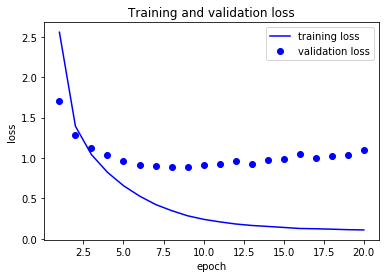

In [146]:
plt.plot(range_epochs, history_dict['loss'],'b', label='training loss')
plt.plot(range_epochs, history_dict['val_loss'], 'bo', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

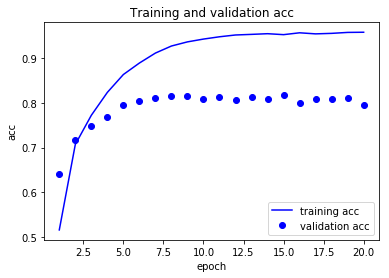

In [147]:
plt.plot(range_epochs, history_dict['acc'],'b', label='training acc')
plt.plot(range_epochs, history_dict['val_acc'], 'bo', label='validation acc')
plt.title('Training and validation acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

## retrain on 9 epochs

In [156]:
model.fit(x=X_train, y=one_hot_train_labels, batch_size=512,epochs=9)

Epoch 1/9
8982/8982 [==============================] - 1s 64us/step - loss: 0.1021 - acc: 0.9581
Epoch 2/9
8982/8982 [==============================] - 1s 64us/step - loss: 0.1021 - acc: 0.9554
Epoch 3/9
8982/8982 [==============================] - 1s 62us/step - loss: 0.0996 - acc: 0.9578
Epoch 4/9
8982/8982 [==============================] - 1s 62us/step - loss: 0.1021 - acc: 0.9561
Epoch 5/9
8982/8982 [==============================] - 1s 64us/step - loss: 0.0978 - acc: 0.9532
Epoch 6/9
8982/8982 [==============================] - 1s 63us/step - loss: 0.0999 - acc: 0.9548
Epoch 7/9
8982/8982 [==============================] - 1s 63us/step - loss: 0.0954 - acc: 0.9564
Epoch 8/9
8982/8982 [==============================] - 1s 63us/step - loss: 0.0978 - acc: 0.9558
Epoch 9/9
8982/8982 [==============================] - 1s 66us/step - loss: 0.0949 - acc: 0.9548


In [157]:
results = model.evaluate(x=X_test, y=one_hot_test_labels)

2246/2246 [==============================] - 0s 89us/step


In [158]:
results

[1.3708536283097306, 0.7849510239896664]

## Predictions on new data

In [0]:
predictions = model.predict(X_test)

In [160]:
predictions

array([[9.9301019e-07, 2.3288601e-06, 3.0354641e-09, ..., 1.7506238e-07,
        1.5662257e-13, 6.0668333e-09],
       [4.2094762e-05, 1.8574314e-01, 1.6323678e-07, ..., 8.2646318e-15,
        2.8824924e-12, 7.3914158e-08],
       [3.7816106e-04, 9.8533475e-01, 1.6389036e-04, ..., 5.0791340e-09,
        1.5241399e-09, 4.5520624e-06],
       ...,
       [2.1920334e-08, 1.2130811e-06, 5.9595873e-08, ..., 3.1276282e-09,
        2.5339754e-13, 2.9956290e-08],
       [9.8359154e-04, 1.0379443e-01, 1.1847481e-04, ..., 6.5507634e-06,
        7.9734323e-11, 1.9063336e-06],
       [1.8808689e-05, 6.6151053e-02, 8.6908741e-03, ..., 4.9268073e-07,
        2.4704603e-09, 4.4046858e-05]], dtype=float32)

In [161]:
predictions[0].shape

(46,)

In [162]:
np.sum(predictions[0])

1.0

In [163]:
np.argmax(predictions[0])

3

## information bottleneck

In [0]:
model = models.Sequential()
model.add(layer=layers.Dense(units=64,activation='relu', input_shape=(10000,)))
model.add(layer=layers.Dense(units=4, activation='relu'))
model.add(layer=layers.Dense(units=46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [170]:
model.fit(x=X_partial_train,y=y_partial_train,batch_size=512,epochs=20,validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 124us/step - loss: 3.4309 - acc: 0.1570 - val_loss: 3.0402 - val_acc: 0.2230
Epoch 2/20
7982/7982 [==============================] - 1s 78us/step - loss: 2.7540 - acc: 0.2196 - val_loss: 2.4999 - val_acc: 0.2330
Epoch 3/20
7982/7982 [==============================] - 1s 82us/step - loss: 2.2471 - acc: 0.4564 - val_loss: 2.1007 - val_acc: 0.5470
Epoch 4/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.8784 - acc: 0.5531 - val_loss: 1.8422 - val_acc: 0.5700
Epoch 5/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.6427 - acc: 0.5806 - val_loss: 1.7068 - val_acc: 0.5830
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.4903 - acc: 0.6072 - val_loss: 1.6159 - val_acc: 0.5990
Epoch 7/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.3807 - acc: 0.6523 - val_loss: 1.5527 - val_acc: 0.6330
Epoch 